# Simple Clauses

In [1]:
from locator import *
from phonstats import agstats
%matplotlib inline

## collect feature groups

In [2]:
loc = Locator(200,include='simple_clauses')
loc.main('discard')

entering 200 26
entering 200 25
entering 200 24
entering 200 23
entering 200 22
entering 200 21
entering 200 20
entering 200 19
entering 200 18
entering 200 17
entering 200 16
entering 200 15
entering 200 14
entering 200 13
entering 200 12
entering 200 11
entering 200 10
entering 200 9
entering 200 8
entering 200 7
entering 200 6
entering 200 5
entering 200 4
entering 200 3
entering 200 2
entering 200 1
checking 0.4K feature groups of length 2
Percent: [##################################################] 100% skipped:0.0K passed: 71
checking 3.7K feature groups of length 3
Percent: [##################################################] 100% skipped:0.0K passed: 129
checking 10.1K feature groups of length 4
Percent: [##################################################] 100% skipped:0.0K passed: 144
checking 15.0K feature groups of length 5
Percent: [##################################################] 100% skipped:0.0K passed: 112
checking 14.6K feature groups of length 6
Percent: [########

## Find the Good Ones Among Them

In [3]:
for g in loc.flagged:
    g.gen_separation(2)
    g.pair_sils()

In [4]:
groups = sorted(loc.flagged,key=lambda g: g.paired_silhouettes.mean(),reverse=True)
good = [g for g in groups if g.paired_silhouettes.mean() > 0.25]

In [5]:
len(good)

41

## Find the Features That Contribute Most to PC1 and PC2 in the Good Groups

In [6]:
loadings = agstats(good)

### PC1

In [7]:
loadings.loc['component 1'][['mean_loading','std','participation']].dropna().sort_values(by='mean_loading',ascending=False)

,mean_loading,std,participation
features,,,
107A,0.535958,0.381142,25
119A,0.533796,0.0222896,11
120A,0.439345,0.416821,11
118A,0.318009,0.134211,15
103A,0.278241,0.136446,11
102A,0.263545,0.129796,8
100A,0.25773,0.126859,17
104A,0.141183,0.10243,7
101A,0.0905177,0.0659335,4


### PC2

In [8]:
loadings.loc['component 2'][['mean_loading','std','participation']].dropna().sort_values(by='mean_loading',ascending=False)

,mean_loading,std,participation
features,,,
120A,0.48006,0.425824,11
112A,0.431343,0.28988,15
107A,0.38007,0.346483,25
101A,0.330746,0.214887,4
118A,0.265604,0.292677,15
104A,0.259288,0.236748,7
102A,0.232194,0.245311,8
116A,0.227744,0.214595,10
100A,0.197095,0.232873,17


## Family Separation in Pairs of the Best Group

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/cluster/unsupervised.py:204: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


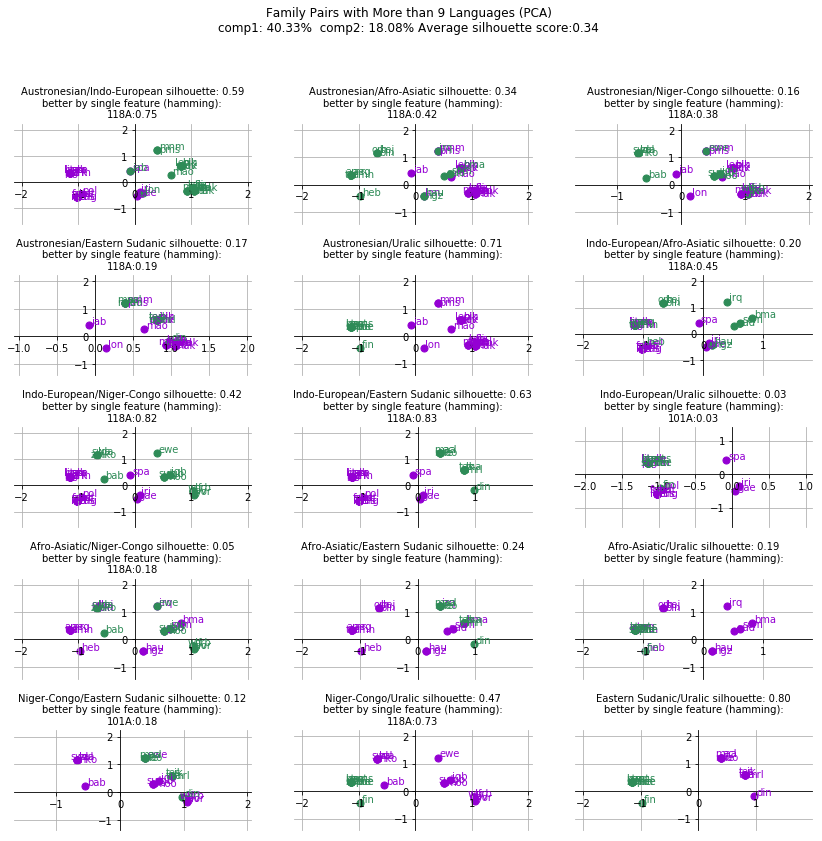

In [9]:
good[0].plot_multifam()